# Assignment 3:

my usual imports and setups

In [2]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

#this makes my plots pretty! but it is totally not mandatory to do it
import json
s = json.load( open("/Users/xiaogewu/PUI2015_fbianco/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

#i know i will use scipy for the tests
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


I need 2 seasons, lets start reading in data from January 2015, and June 2015. 
One month is not a season. You should import data from other months in the winter as well, and then several summer months to get the other distribution. I am being lazy but you should not be. 



In [24]:
df_W=pd.read_csv('201501-citibike-tripdata.csv')
print df_W.columns
df_S=pd.read_csv('201506-citibike-tripdata.csv')


Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


## get the age like we did before, subscribers only cause otherwise the ages are really sparse anyways


In [25]:
#df is the dataframe where the content of the csv file is stored
df_W['age'] = 2015-df_W['birth year'][(df_W['usertype'] == 'Subscriber')]
df_S['age'] = 2015-df_S['birth year'][(df_S['usertype'] == 'Subscriber')]
df_ALL = pd.concat([df_S,df_W], axis=0)

lets split age in 10 year bins. see the comment in assignment 1 about this

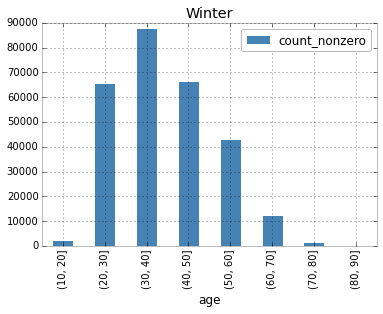

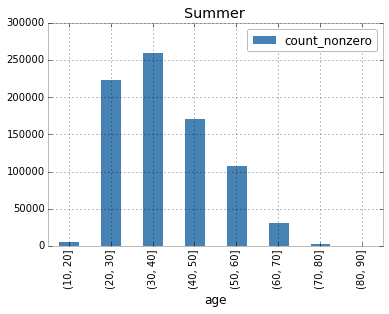

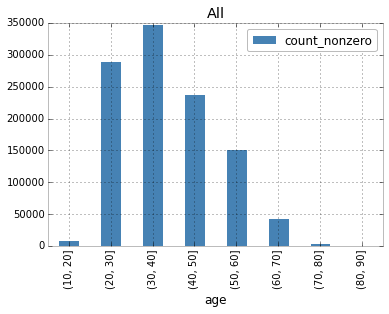

In [26]:
bins = np.arange(10, 99, 10)
df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter")
W_age_dist = df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero])
df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Summer")
S_age_dist = df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero])
df_ALL.age.groupby(pd.cut(df_ALL.age, bins)).agg([count_nonzero]).plot(kind='bar', title="All")
A_age_dist = df_ALL.age.groupby(pd.cut(df_ALL.age, bins)).agg([count_nonzero])
    

how do they look? what should I expect? setting some expectation is useful as a sanity check!

lets run the scipy KS test

# KS tests for goodness of fit

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

In [32]:
#compare to normal

ksW=scipy.stats.kstest(W_age_dist, 'norm')
ksS=scipy.stats.kstest(S_age_dist, 'norm')
ksA=scipy.stats.kstest(A_age_dist, 'norm')
print "winter, normal fit", ksW
print "summer, normal fit", ksS
print "All riders, normal fit", ksA

#compare to poisson 

ksW=scipy.stats.kstest(W_age_dist, 'cauchy')
ksS=scipy.stats.kstest(S_age_dist, 'cauchy')
ksA=scipy.stats.kstest(A_age_dist, 'cauchy')
print "winter, normal fit", ksW
print "summer, normal fit", ksS
print "All riders, normal fit", ksA


winter, normal fit KstestResult(statistic=1.0, pvalue=0.0)
summer, normal fit KstestResult(statistic=1.0, pvalue=0.0)
All riders, normal fit KstestResult(statistic=1.0, pvalue=0.0)
winter, normal fit KstestResult(statistic=0.99999637418970078, pvalue=0.0)
summer, normal fit KstestResult(statistic=0.9999987788873137, pvalue=0.0)
All riders, normal fit KstestResult(statistic=0.99999908652913039, pvalue=0.0)


the scipy KS test works with keywords only for scipy.stats distributions 
that take as a single argument the size of the sample, like norm and cauchy look them up to make sure I am right!
if i want to test against a distribution which takes more arguments like Poisson, which in scipy.stats takes the 
lambda parameter and the size (2 arguments) i can pass the extra arguments in arg, like i do below: 

In [33]:
# compare to Gamma

ksW=scipy.stats.kstest(W_age_dist, 'gamma', args=(35,))
ksS=scipy.stats.kstest(S_age_dist, 'gamma', args=(35,))
ksA=scipy.stats.kstest(A_age_dist, 'gamma', args=(35,))
print "winter, normal fit", ksW
print "summer, normal fit", ksS
print "All riders, normal fit", ksA


winter, normal fit KstestResult(statistic=1.0, pvalue=0.0)
summer, normal fit KstestResult(statistic=1.0, pvalue=0.0)
All riders, normal fit KstestResult(statistic=1.0, pvalue=0.0)


# AD Tests

In [42]:
# compare to normal

adW=scipy.stats.anderson(W_age_dist['count_nonzero'], dist='norm')
adS=scipy.stats.anderson(S_age_dist['count_nonzero'], dist='norm')
adA=scipy.stats.anderson(A_age_dist['count_nonzero'], dist='norm')

print "winter, normal fit", adW
print "summer, normal fit", adS
print "All riders, normal fit", adA

winter, normal fit AndersonResult(statistic=0.51784746818828786, critical_values=array([ 0.519,  0.591,  0.709,  0.827,  0.984]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
summer, normal fit AndersonResult(statistic=0.49445082104942983, critical_values=array([ 0.519,  0.591,  0.709,  0.827,  0.984]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
All riders, normal fit AndersonResult(statistic=0.48879337107880438, critical_values=array([ 0.519,  0.591,  0.709,  0.827,  0.984]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [44]:
#compare to expon

adW=scipy.stats.anderson(W_age_dist['count_nonzero'], dist='expon')
adS=scipy.stats.anderson(S_age_dist['count_nonzero'], dist='expon')
adA=scipy.stats.anderson(A_age_dist['count_nonzero'], dist='expon')
print "winter, normal fit", adW
print "summer, normal fit", adS
print "All riders, normal fit",adA

winter, normal fit AndersonResult(statistic=1.5981565415121732, critical_values=array([ 0.858,  1.003,  1.247,  1.494,  1.82 ]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
summer, normal fit AndersonResult(statistic=1.6697636810044756, critical_values=array([ 0.858,  1.003,  1.247,  1.494,  1.82 ]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
All riders, normal fit AndersonResult(statistic=1.6403068040605575, critical_values=array([ 0.858,  1.003,  1.247,  1.494,  1.82 ]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [43]:
#compare to logistic 

adW=scipy.stats.anderson(W_age_dist['count_nonzero'], dist='logistic')
adS=scipy.stats.anderson(S_age_dist['count_nonzero'], dist='logistic')
adA=scipy.stats.anderson(A_age_dist['count_nonzero'], dist='logistic')
print "winter, normal fit", adW
print "summer, normal fit", adS
print "All riders, normal fit",adA

winter, normal fit AndersonResult(statistic=0.55307155388972085, critical_values=array([ 0.413,  0.546,  0.64 ,  0.746,  0.879,  0.979]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))
summer, normal fit AndersonResult(statistic=0.52195419069792948, critical_values=array([ 0.413,  0.546,  0.64 ,  0.746,  0.879,  0.979]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))
All riders, normal fit AndersonResult(statistic=0.51970396937576879, critical_values=array([ 0.413,  0.546,  0.64 ,  0.746,  0.879,  0.979]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))
